In [1]:
from include.customer_segmentation_functions import *

In [2]:
map_source_url= R"DataSets\country_map\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp"

In [3]:
data_file= R"DataSets\rfm_ana\online_retail_II.csv"
main_data= pd.read_csv(data_file,encoding ='cp1252')
data= main_data #.sample(10000)

<div class="alert alert-block alert-success">
To keep the repo and this doc clean, I have kept all the user defined function used in this doc to a different python file(include/customer_segmentation_functions.py).
</div>

<div class="center_header">

# About the data:

</div>
<p>
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/201- The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
</p>

<h5 style="margin: 0px; padding: 0px;">Attribute Information:</h5>
<ul>
<li>InvoiceNo:</li> Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
<li>StockCode:</li> Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
<li>Description:</li> Product (item) name. Nominal.
<li>Quantity:</li> The quantities of each product (item) per transaction. Numeric.
<li>InvoiceDate:</li> Invice date and time. Numeric. The day and time when a transaction was generated.
<li>UnitPrice:</li> Unit price. Numeric. Product price per unit in sterling (Â£).
<li>CustomerID:</li> Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
<li>Country:</li> Country name. Nominal. The name of the country where a customer resides
</ul>

find the dataset here __[here](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/data)__

<style>
  .center_header {
  line-height: 90px;
  height: 90px;
  border: 5px solid blue;
  text-align: center;
  font-size: xx-large;
  }
</style>

<div class="center_header">

## What is RFM ?

</div>

### What is Customer Segmentation ?

<p>
  Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.<br>
</p>

__[article link](https://www.optimove.com/resources/learning-center/customer-segmentation)__


### Different types of customer segmentation:

<ul>
<li>Demographic customer segmentation</li>
<li>Geographic customer segmentation</li>
<li>Behavioral customer segmentation</li>
<li>Psychographic customer segmentation</li>
<li>Technographic customer segmentation</li>
</ul>

### What is RFM Segmentation?

<p>
RFM segmentation is a marketing analysis method that involves analyzing customer behavior based on three key factors: recency, frequency, and monetary value. This RFM analysis helps businesses categorize customers into segments, enabling targeted and personalized marketing strategies.  
</p>

<ul>
<li>Recency:</li> How much time has elapsed since a customer’s last activity or transaction with the brand? Activity is usually a purchase, although variations are sometimes used, e.g., the last visit to a website or use of a mobile app. In most cases, the more recently a customer has interacted or transacted with a brand, the more likely that customer will be responsive to communications from the brand. 
<li>Frequency:</li> How often has a customer transacted or interacted with the brand during a particular period of time? Clearly, customers with frequent activities are more engaged, and probably more loyal, than customers who rarely do so. And one-time-only customers are in a class of their own. 
<li>Monetary:</li> Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time. Big spenders should usually be treated differently than customers who spend little. Looking at monetary divided by frequency indicates the average purchase amount – an important secondary factor to consider when segmenting customers. 
</ul>

__[article link](https://www.optimove.com/resources/learning-center/rfm-segmentation)__


















<style>
  .center_header {
  line-height: 90px;
  height: 90px;
  border: 5px solid blue;
  text-align: center;
  font-size: xx-large;
  }

<div class="center_header">

# General view of the dataset:

</div>

<style>
  .center_header {
  line-height: 90px;
  height: 90px;
  border: 5px solid blue;
  text-align: center;
  font-size: xx-large;
  }

In [4]:
data.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
339607,522501,22649,STRAWBERRY FAIRY CAKE TEAPOT,2,2010-09-15 11:07:00,4.95,15039.0,United Kingdom
455141,532626,21927,BLUE/CREAM STRIPE CUSHION COVER,12,2010-11-12 15:33:00,1.25,12779.0,Poland
604320,542898,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,8,2011-02-01 14:01:00,0.65,16110.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,1067371,53628,537434,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,1067371,5305,85123A,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1067371.0,NaN,NaN,NaN,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1067371.0,NaN,NaN,NaN,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,NaN,NaN,NaN,15324.638504,1697.46445,12346.0,13975.0,15255.0,16797.0,18287.0
Country,1067371,43,United Kingdom,981330,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="center_header">

# Data Preprocessing:

</div>
<p>

`Which involves few steps eg: Data Cleaning, Data Transformation, Data Reduction, etc`

</p>
<style>
  .center_header {
  line-height: 90px;
  height: 90px;
  border: 5px solid blue;
  text-align: center;
  font-size: xx-large;
  }

In [7]:
#cahnging col name
data.rename(columns = {x:x.lower().replace(' ','') for x in data.columns}, inplace = True)

#change datatype
data['quantity'] = pd.to_numeric(data['quantity'])
data['price'] = pd.to_numeric(data['price'])
data["invoicedate"]=pd.to_datetime(data["invoicedate"])

#removing extra white spaces
data["description"]= data["description"].str.strip()
data.sample(3)

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
114794,500336,16236,KITTY PENCIL ERASERS,3,2010-03-07 13:48:00,0.21,17589.0,United Kingdom
745679,556127,22417,PACK OF 60 SPACEBOY CAKE CASES,24,2011-06-09 10:23:00,0.55,12406.0,Denmark
664318,548214,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-03-30 09:17:00,1.25,13720.0,United Kingdom


<div class="alert alert-block alert-info", style= "width: 65%;">

### Checking for null(NaN) values in the dataset:
</div>

In [8]:
for col_name in ["stockcode", "description", "quantity", "price", "customerid"]:
    get_value_counts(data, col_name)

****************************************
column name: stockcode
****************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 5305
    number of total value: 1067371 (including none)
   number of total Values: 1067371


*******************************************
column name: description
*******************************************
    number of 'NaN' value: 4382
percentage of 'NaN' value: 0.41%
   number of unique value: 5655
    number of total value: 1067371 (including none)
   number of total Values: 1062989


**************************************
column name: quantity
**************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 1057
    number of total value: 1067371 (including none)
   number of total Values: 1067371


********************************
column name: price
********************************
    number of 'NaN' value: 0
percentage of 'NaN

<div class="alert alert-block alert-info", style= "width: 65%;">

### Removing rows with NaN values and cancelled items.<br>The invoice code, starting with 'C' were cancalled.
</div>

In [9]:
data= drop_nun_val_in_col(data, "customerid")
data= drop_canceled_items(data)

***************************************************************
droping rows where customerid = NaN
***************************************************************
Row counts before droping 'NaN' values: 1067371
 Row counts after droping 'NaN' values: 824364
----------------------------------------
*                     Total rows droped: 243007
*             Percentage of droped rows: 22.77%


******************************************************
droping rows of canceled items
******************************************************
Number of rows before droping canceled items: 824364
 Number of rows after droping canceled items: 805620
----------------------------------------
*                          Total rows droped: 18744
*                  Percentage of droped rows: 2.27%




In [10]:
data['customerid']= data['customerid'].astype(np.int64).astype("string")
data['quantity']= data['quantity'].astype(np.int64)
data["invoicetime"]= data["invoicedate"].dt.time
data["invoicedate"]= data["invoicedate"].dt.date

In [11]:
print(data[data["price"]<0]["price"].count())
print(data[data["quantity"]<0]["quantity"].count())

0
0


<div class="alert alert-block alert-info", style= "width: 65%;">

### We can ignore the products which have no price (that is =0.0).<br> Also removing duplicate entries.
</div>

In [12]:
print(f"before cleaning 0 price iteams:\n{data[data["price"] ==0]}")
data= data[data["price"] !=0.0]

before cleaning 0 price iteams:
        invoice stockcode                     description  quantity invoicedate  price customerid         country invoicetime
4674     489825     22076                6 RIBBONS EMPIRE        12  2009-12-02    0.0      16126  United Kingdom    13:34:00
6781     489998     48185             DOOR MAT FAIRY CAKE         2  2009-12-03    0.0      15658  United Kingdom    11:19:00
16107    490727         M                          Manual         1  2009-12-07    0.0      17231  United Kingdom    16:38:00
18738    490961     22065   CHRISTMAS PUDDING TRINKET POT         1  2009-12-08    0.0      14108  United Kingdom    15:25:00
18739    490961     22142     CHRISTMAS CRAFT WHITE FAIRY        12  2009-12-08    0.0      14108  United Kingdom    15:25:00
...         ...       ...                             ...       ...         ...    ...        ...             ...         ...
1004540  577129     22464     HANGING METAL HEART LANTERN         4  2011-11-17    0.0

In [13]:
print(f"row count before removing duplicates:{len(data)}")
data.drop_duplicates(inplace= True)
print(f" row count after removing duplicates:{len(data)}")

row count before removing duplicates:805549
 row count after removing duplicates:779425


<div class="alert alert-block alert-info", style= "width: 65%;">

### Removing outliers in Unit price and Quantity
</div>

<i> For calculating upper and lower bound we took 5 percentile as Q1 and 95 percentile as Q3 </i>

In [14]:
data[["quantity", "price"]].describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,779425.0,13.489370,145.855814,1.000,2.00,6.00,12.00,80995.0
price,779425.0,3.218488,29.676140,0.001,1.25,1.95,3.75,10953.5


In [15]:
new_df= outlier_remover(data, "price")
new_df= outlier_remover(new_df, "quantity")

******************************************************
Removing outlier in col: price
******************************************************
*You have selected Q1= 5 percentile 
and Q3= 95 percentile

*Lowerbound: -11.700000000000001 
and Upperbound: 20.62
*before removing outliers: 
count    779425.000000
mean          3.218488
std          29.676140
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: price, dtype: float64

* after removing outliers: 
count    777221.000000
mean          2.867743
std           2.803582
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max          20.300000
Name: price, dtype: float64
***********************************************************
Removing outlier in col: quantity
***********************************************************
*You have selected Q1= 5 percentile 
and Q3= 95 percentile

*Lowerbound: -51.5 
and Upperbound: 88.5
*before

In [16]:
data= new_df
data[["quantity", "price"]].describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,760725.0,8.789062,10.832028,1.000,2.00,5.00,12.00,88.0
price,760725.0,2.901453,2.818504,0.001,1.25,1.95,3.75,20.3


<div class="center_header">

# Exploratory data analysis (EDA):

</div>
<style>
  .center_header {
  line-height: 90px;
  height: 90px;
  border: 5px solid blue;
  text-align: center;
  font-size: xx-large;
  }

<div class="alert alert-block alert-info", style= "width: 65%;">

### checking stockcode and description relationships
</div>

In [17]:
check_relationship_type(data, "stockcode", "description")

***********************************************************************************************
Checking relationship for 	stockcode -to- description
***********************************************************************************************
*many-to-many


In [18]:
descr= recheck_relationship_type(data, "description", "stockcode")
stockc= recheck_relationship_type(data, "stockcode", "description")

***************************************************************************************************
rechecking relationship for 	description -to- stockcode
***************************************************************************************************


100%|██████████| 5178/5178 [05:18<00:00, 16.25it/s]


*39 'description' are related to more than one 'stockcode'
['BATHROOM METAL SIGN', 'GINGHAM HEART DECORATION', 'COLOURING PENCILS BROWN TUBE', 'COLUMBIAN CANDLE ROUND', 'HEART T-LIGHT HOLDER', 'FAIRY CAKE PLACEMATS', 'BLUE FLOCK GLASS CANDLEHOLDER', 'RETRO PLASTIC POLKA TRAY', 'PINK FLOCK GLASS CANDLEHOLDER', "RETRO PLASTIC 70'S TRAY", 'PINK JEWELLED PHOTO FRAME', 'PASTEL BLUE PHOTO ALBUM', 'PASTEL PINK PHOTO ALBUM', 'METAL SIGN,CUPCAKE SINGLE HOOK', 'ACRYLIC JEWEL SNOWFLAKE,BLUE', 'EAU DE NILE JEWELLED PHOTOFRAME', 'RETRO PLASTIC DAISY TRAY', 'FROSTED WHITE BASE', 'FRENCH FLORAL CUSHION COVER', 'BLACK SILOUETTE CANDLE PLATE', 'WHITE BAMBOO RIBS LAMPSHADE', 'PINK FLOWERS RABBIT EASTER', 'ROSE DU SUD CUSHION COVER', 'SQUARE CHERRY BLOSSOM CABINET', 'COLUMBIAN CANDLE RECTANGLE', 'MODERN CHRISTMAS TREE CANDLE', 'This is a test product.', 'FRENCH PAISLEY CUSHION COVER', 'PINK FAIRY CAKE CUSHION COVER', 'FRENCH LATTICE CUSHION COVER', 'SET OF 4 FAIRY CAKE PLACEMATS', 'WATERING CAN GREEN DIN

100%|██████████| 4575/4575 [05:05<00:00, 14.96it/s]

*593 'stockcode' are related to more than one 'description'
['21232', '21523', '22350', '22349', '22195', '22353', '48173C', '21181', '22139', '22352', '85014A', '85014B', '22333', '85232B', '22321', '21955', '84899E', '85123A', '22029', '20754', '21035', '82001S', '21041', '35916B', '22180', '22241', '22199', '22083', '21485', '21928', '85099B', '22356', '20724', '21592', '20725', '21217', '84946', '22090', '22179', '22232', '82486', '21212', '21707', '21710', '21708', '21706', '21711', '20752', '48185', '84997D', '84997C', '71477', '47591D', '84997A', '21245', '21241', '21584', '47591A', '84997B', '84951A', '21244', '20675', '48187', '22080', '82600', '21588', '21818', '48111', '20685', '48194', '21495', '20677', '20676', '21175', '22197', '21238', '21240', '21239', '21498', '21537', '20718', '21539', '21527', '21533', '21531', '20914', '21242', '21535', '21844', '22073', '22072', '20682', '48129', '20622', '21122', '21124', '21004', '21500', '72801E', '21980', '22071', '22070', '215

In [19]:
print(len(stockc))
for val in random.sample(stockc, 5):
    print(f"{val}: {data[data["stockcode"]==val]["description"].unique()}")

593
23280: ['FOLDING BUTTERFLY MIRROR HOT PINK' 'FOLDING MIRROR HOT PINK']
22631: ['CIRCUS PARADE LUNCHBOX' 'CIRCUS PARADE LUNCH BOX']
22777: ['GLASS CLOCHE LARGE' 'GLASS BELL JAR LARGE']
22383: ['LUNCHBAG SUKI  DESIGN' 'LUNCH BAG SUKI  DESIGN' 'LUNCH BAG SUKI DESIGN']
23148: ['MINIATURE ANTIQUE ROSE HOOK IVORY' 'MINITURE ANTIQUE ROSE HOOK IVORY']


In [20]:
print(len(descr))
for val in random.sample(descr, 5):
    print(f"{val}: {data[data["description"]==val]["stockcode"].unique()}")

39
HEART T-LIGHT HOLDER: ['21814' '85118']
WHITE BAMBOO RIBS LAMPSHADE: ['40001' '40002' '40003']
FAIRY CAKE PLACEMATS: ['84509B' '84509G']
FROSTED WHITE BASE: ['79406' '79403']
RETRO PLASTIC 70'S TRAY: ['79192A' '79190A']


In [21]:
data.drop(columns=['stockcode'], inplace= True)

<div class="alert alert-block alert-warning",  style= "width: 55%;>

##### Findings:

Here we can see that the stock code and product description don't have a 'one-to-one' relationship due to errors such as typing mistakes and the use of different synonymous words for the same product code. However, we can safely assume that they indeed have a one-to-one relationship and we can drop one of this 2 columns.<br>So we can remove the column 'stokecode'
</div>

<div class="alert alert-block alert-info", style= "width: 65%;">

### Checking customer and country relationships(if any customer is associated with more than one country)
</div>

In [22]:
check_relationship_type(data, "customerid", "customerid")

***********************************************************************************************
Checking relationship for 	customerid -to- customerid
***********************************************************************************************
*many-to-many


In [23]:
cust_list= recheck_relationship_type(data, "customerid", "country")

**********************************************************************************************
rechecking relationship for 	customerid -to- country
**********************************************************************************************


100%|██████████| 5772/5772 [06:39<00:00, 14.46it/s]

*12 'customerid' are related to more than one 'country'
['12417', '12455', '12422', '12431', '12370', '12429', '12423', '12449', '12457', '12652', '12413', '12394']


In [24]:
for val in cust_list:
    print(f"{val}: {data[data["customerid"]==val]["country"].unique()}")

12417: ['Belgium' 'Spain']
12455: ['Cyprus' 'Spain']
12422: ['Australia' 'Switzerland']
12431: ['Belgium' 'Australia']
12370: ['Austria' 'Cyprus']
12429: ['Denmark' 'Austria']
12423: ['Denmark' 'Belgium']
12449: ['Denmark' 'Belgium']
12457: ['Switzerland' 'Cyprus']
12652: ['Germany' 'France']
12413: ['Spain' 'France']
12394: ['Belgium' 'Denmark']


<div class="alert alert-block alert-warning",  style= "width: 55%;>

##### Findings:

very few customer made purched from more than one contry
</div>

<div class="alert alert-block alert-info", style= "width: 65%;">

### Since we have quantity and unit price, we will calculate the total price/revenue
</div>

> $ revenue= quantity * unitprice $

In [25]:
data["totalprice"]= data["quantity"]* data["price"]
data.sample(3)

,invoice,description,quantity,invoicedate,price,customerid,country,invoicetime,totalprice
652496,547134,NUMBER TILE VINTAGE FONT 4,8,2011-03-21,1.95,15996,United Kingdom,11:57:00,15.60
328551,521450,PICTURE FRAME WOOD TRIPLE PORTRAIT,8,2010-09-06,6.75,14442,Channel Islands,11:32:00,54.00
160518,504704,ROMANTIC PINKS RIBBONS,1,2010-04-15,1.25,15031,United Kingdom,19:22:00,1.25


<div class="alert alert-block alert-info", style= "width: 65%;">

### Descriptive stats for quantitative datas:
</div>


**********************************************************************************************************
Descriptive Stats for ['quantity', 'price', 'totalprice'] :
**********************************************************************************************************
               count       mean        std    min   25%    50%    75%     max    IQR  lower bound  upper bound
quantity    760725.0   8.789062  10.832028  1.000  2.00   5.00  12.00    88.0  10.00      -13.000       27.000
price       760725.0   2.901453   2.818504  0.001  1.25   1.95   3.75    20.3   2.50       -2.500        7.500
totalprice  760725.0  16.686974  24.910600  0.001  4.95  11.70  17.88  1356.0  12.93      -14.445       37.275 




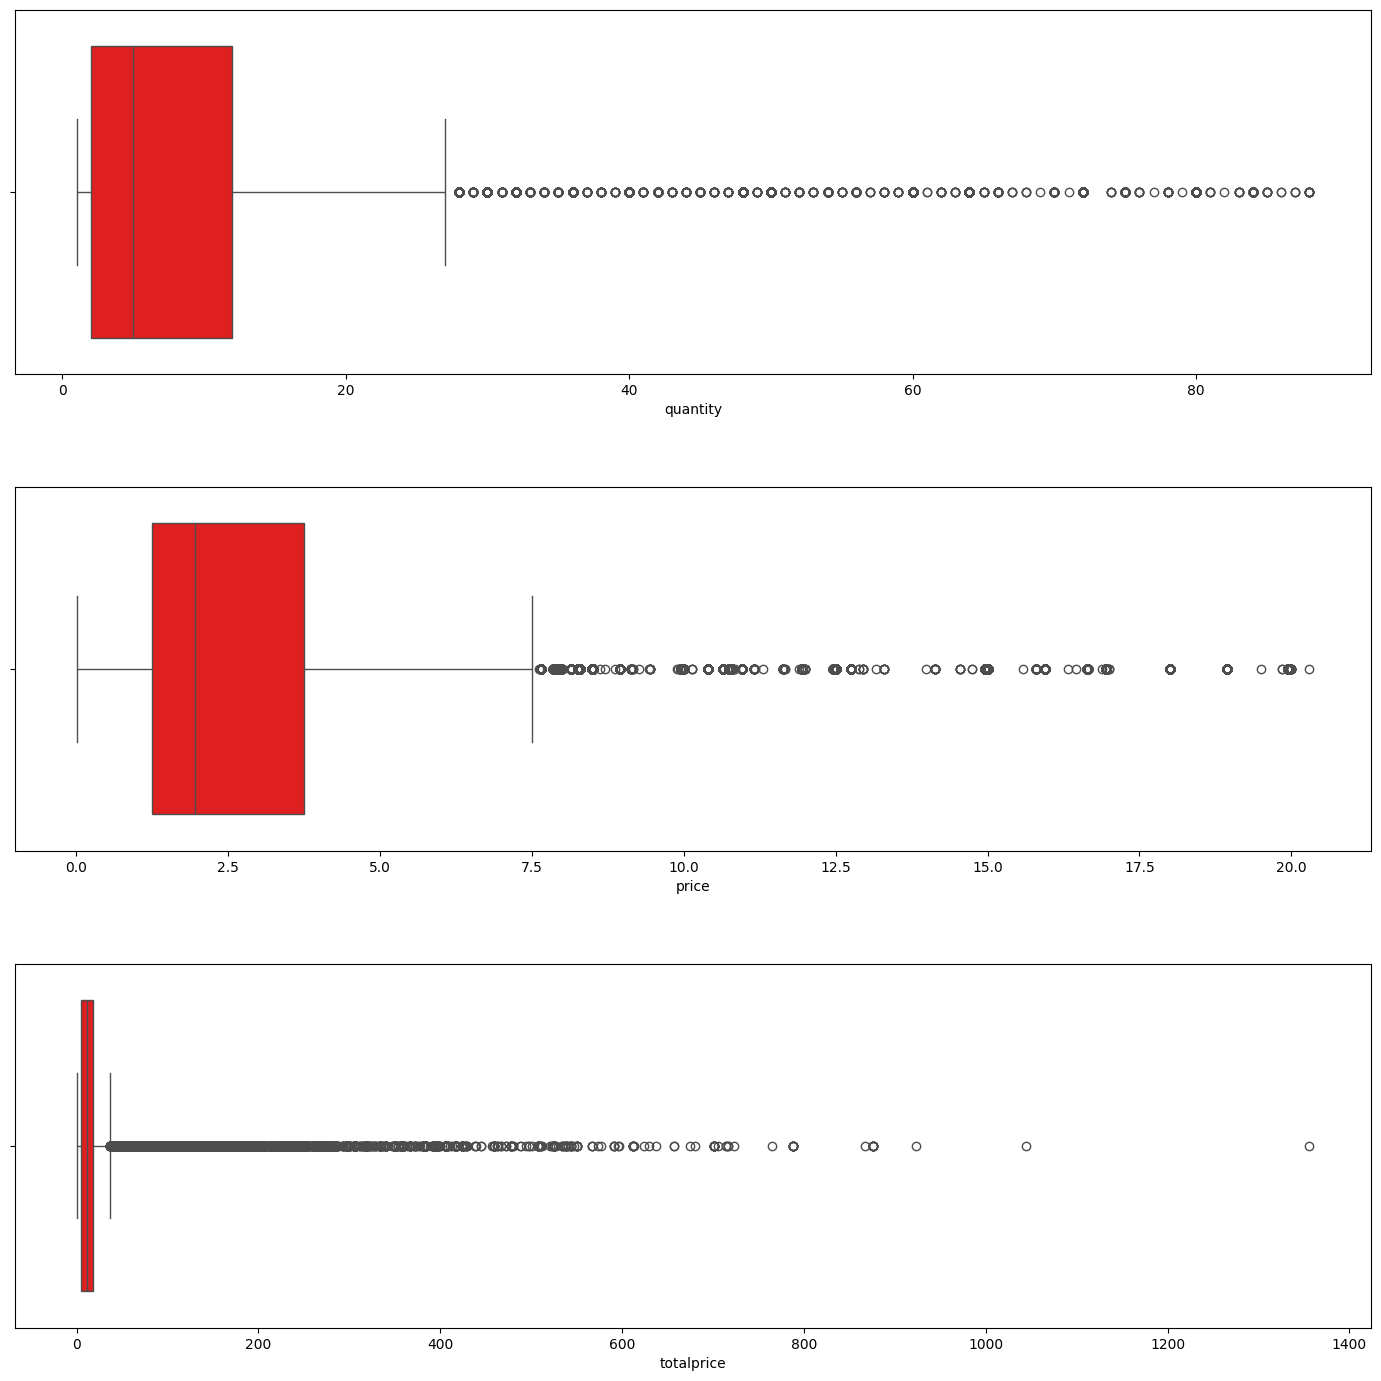

In [26]:
get_descriptive_stats(data, ['quantity', 'price', 'totalprice'] )

<div class="alert alert-block alert-info", style= "width: 65%;">

### Descriptive stats for qualitatitve datas:
</div>


*******************************************************************************************************************
Descriptive Stats for ['description', 'customerid', 'country'] :
*******************************************************************************************************************
              count unique                                 top    freq
description  760725   5178  WHITE HANGING HEART T-LIGHT HOLDER    4890
customerid   760725   5772                               17841   12380
country      760725     41                      United Kingdom  686682 




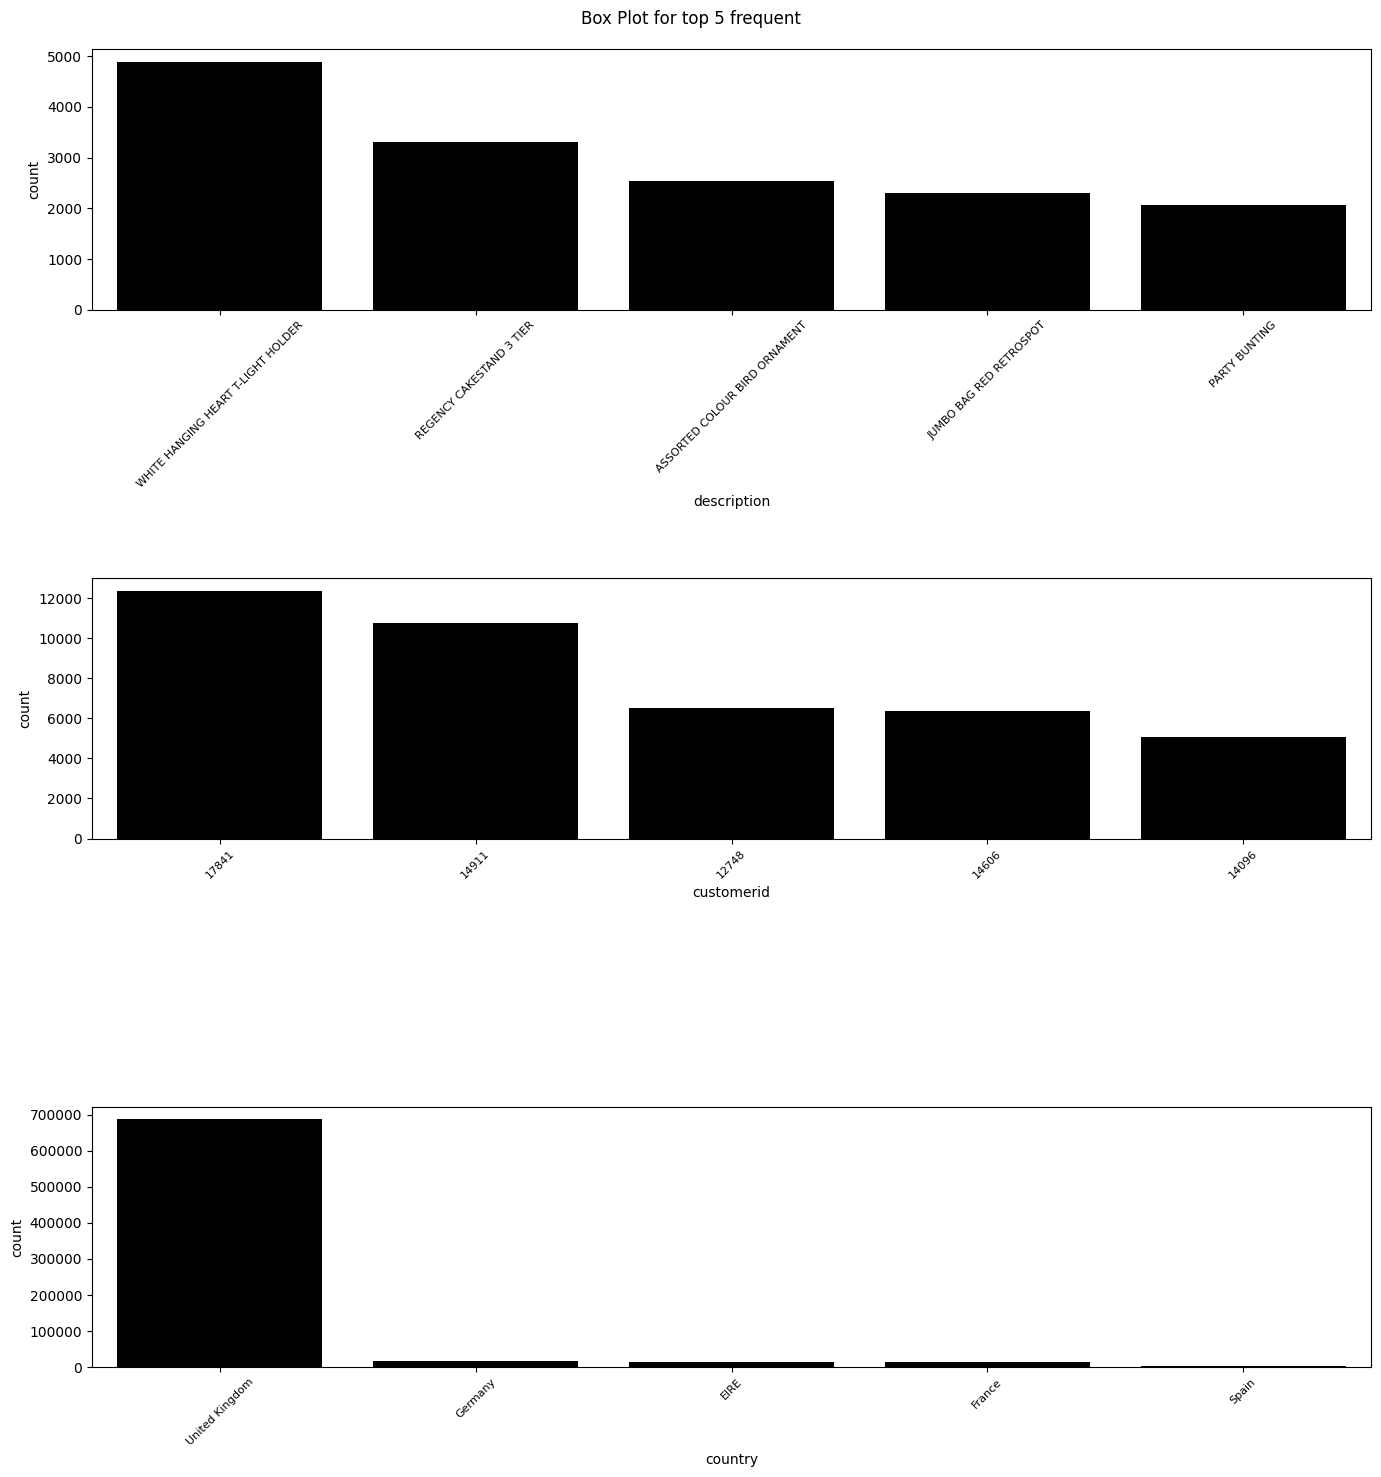

In [27]:
get_descriptive_stats(data, ['description', 'customerid', 'country'] )

<div class="center_header">

# RFM analysis:

</div>


<div class="alert alert-block alert-success">

`Here:`

-  T --> Interpurchase Time
- L --> Shopping Cycle
- F --> Frequency
- T1 --> First purchase
- Tn --> Last purchase
- $ T = L/(F-1) = (Tn - T1)/(F-1) $
</div>

<style>
  .center_header {
  line-height: 90px;
  height: 90px;
  border: 5px solid blue;
  text-align: center;
  font-size: xx-large;
  }
</style>

****************************************
RMF dataset prepartion
****************************************
*Date starts from: 2009-12-01 to 2011-12-09
*We are only conside the customers who made more than one purchase
Sample data:
      customerid  recency  frequency  monetary  interpurchase_time
3828      16287      169          5    896.46                 104
5542      18055        7         14  10073.52                  29
5419      17926      133          5   1035.49                  89


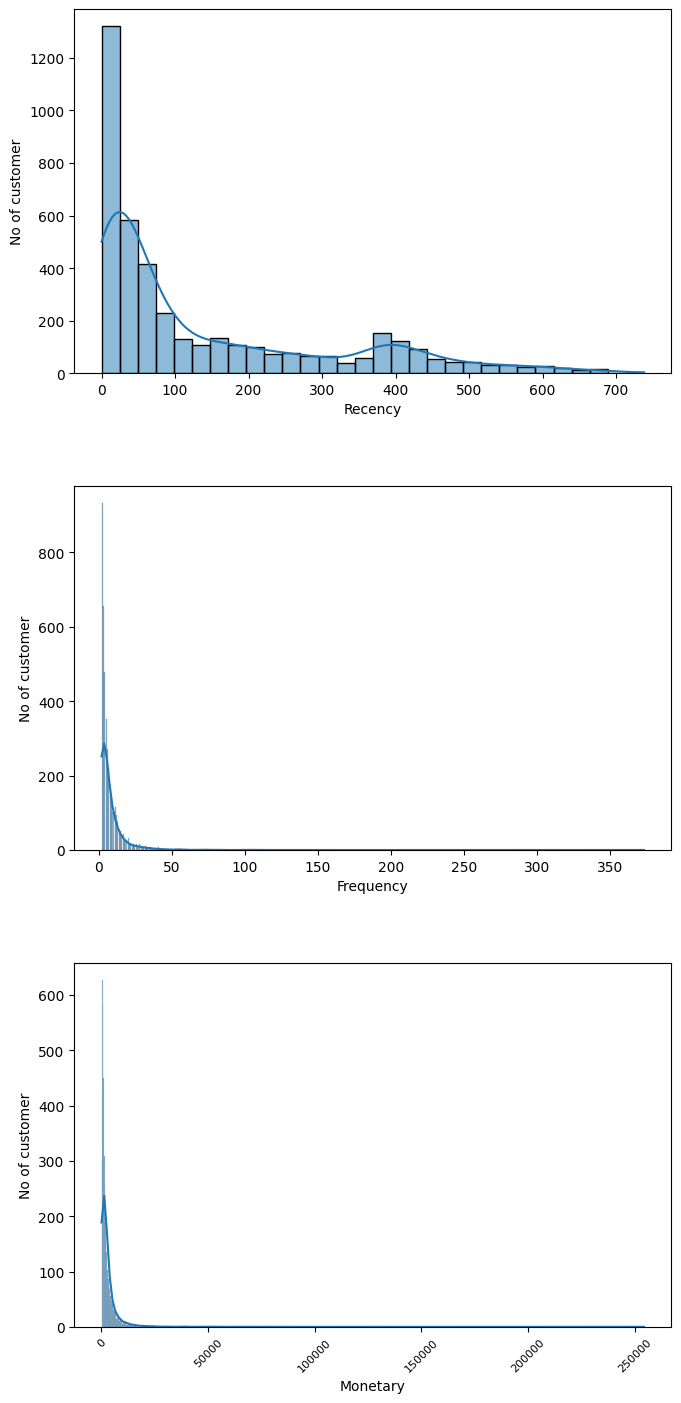

In [28]:
RFM= get_rmf_data_set(data)

<div class="alert alert-block alert-success", style= "width: 65%;">

- calculating R,F,M,T score based on quartiles 
- rfm_score= R+F+M
- rfm_score: Label
     - 01 - 03: Silver
     - 03 - 05: Gold
     - 05 - 09: Platinum
     - 09 - 12: Diamond
</div>

In [29]:
RFM_with_score= rfm_score_calculate(RFM)

*************************************************
dfT score :                
*************************************************
*max rmf_score: 12
min rmf_score: 3
sample:
     customerid  recency  frequency  monetary  interpurchase_time  R  F  M  T  rfm_score     label
2837      15269       23          3    935.36                 122  2  2  2  4          6  Platinum
4525      17005      470          2    415.00                  59  4  1  1  3          6  Platinum
3215      15656       45          4    748.50                  59  2  2  2  3          6  Platinum
636       12998      492          3    771.76                  53  4  2  2  2          8  Platinum


  Platinum  Diamond  Gold  Silver
      2948      628   531      67


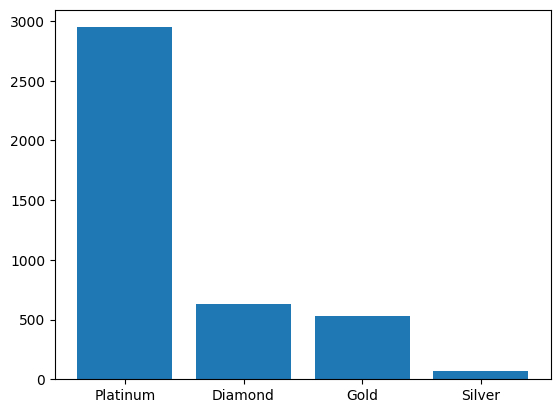

In [30]:
barplot = dict(RFM_with_score['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

<div class="center_header">

# Choropleth Map:

</div>

find the dataset for map cordination here __[here](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip)__
<style>
  .center_header {
  line-height: 90px;
  height: 90px;
  border: 5px solid blue;
  text-align: center;
  font-size: xx-large;
  }
</style>

In [32]:
# merged_df= choropleth_map_plot(data, map_source_url)